# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 1.) US perm Visas csv from cycle using zip extractor


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [5]:
df_selected=df[['class_of_admission','country_of_citizenship','job_info_education','wage_offer_from_9089','case_status']]

In [6]:
df_selected.dropna()

,class_of_admission,country_of_citizenship,job_info_education,wage_offer_from_9089,case_status
135269,H-1B,INDIA,Bachelor's,"90,000.00",Certified
135271,H-1B,GERMANY,Doctorate,"65,000.00",Denied
135272,E-2,SOUTH KOREA,Master's,"43,514.00",Certified
135274,F-1,SOUTH KOREA,None,"24,710.00",Certified
135275,H-1B,CANADA,Bachelor's,"55,700.00",Certified-Expired
...,...,...,...,...,...
374356,H-1B,CHINA,Master's,"142,938.00",Withdrawn
374358,L-1,VIETNAM,Master's,"122,000.00",Withdrawn
374359,H-1B,INDIA,Master's,"79,082.00",Withdrawn
374360,B-2,SOUTH KOREA,None,"37,981.00",Withdrawn


# 3.) Clean your data for a decision tree


In [7]:
# convert the column to string type
df_selected['wage_offer_from_9089'] = df_selected['wage_offer_from_9089'].astype(str)

for i, value in enumerate(df_selected['wage_offer_from_9089']):
    try:
        df_selected.loc[i, 'wage_offer_from_9089'] = float(value.replace(',',''))
    except ValueError:
        df_selected.loc[i, 'wage_offer_from_9089'] = np.nan

# display the dataframe
df_selected=df_selected.dropna()

<ipython-input-7-30163ef9e76f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['wage_offer_from_9089'] = df_selected['wage_offer_from_9089'].astype(str)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [8]:
df_selected.isnull().sum()

class_of_admission        0
country_of_citizenship    0
job_info_education        0
wage_offer_from_9089      0
case_status               0
dtype: int64

In [9]:
dummies1=pd.get_dummies(df_selected['class_of_admission'])
dummies2=pd.get_dummies(df_selected['country_of_citizenship'])
dummies3=pd.get_dummies(df_selected['job_info_education'])
# dummies4=pd.get_dummies(df_selected['case_status'])

In [10]:
X=pd.concat([dummies1,dummies2,dummies3, df_selected[['wage_offer_from_9089']]],axis=1)
y=df_selected[['case_status']]
# y=dummies4
# unique_values = pd.Series(y['case_status'].unique())
# unique_values

In [11]:
from sklearn.preprocessing import LabelEncoder

for col in y:
    # create an object of LabelEncoder
    le=LabelEncoder()
    y[col]=le.fit_transform(y[col])



<ipython-input-11-b7df7a7ab4c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col]=le.fit_transform(y[col])


In [12]:
X.head()

,A-3,A1/A2,B-1,B-2,C-1,C-3,D-1,E-1,E-2,E-3,...,ZAMBIA,ZIMBABWE,Associate's,Bachelor's,Doctorate,High School,Master's,None,Other,wage_offer_from_9089
135269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,90000.0
135271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,65000.0
135272,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,43514.0
135274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,24710.0
135275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,55700.0


In [13]:
unique_values = pd.Series(y['case_status'].unique())
unique_values

# y.head()

0    0
1    2
2    1
3    3
dtype: int64

# 4.) Fit and plot a decision tree of depth 3


In [14]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=3)

In [15]:
clf=clf.fit(X,y)

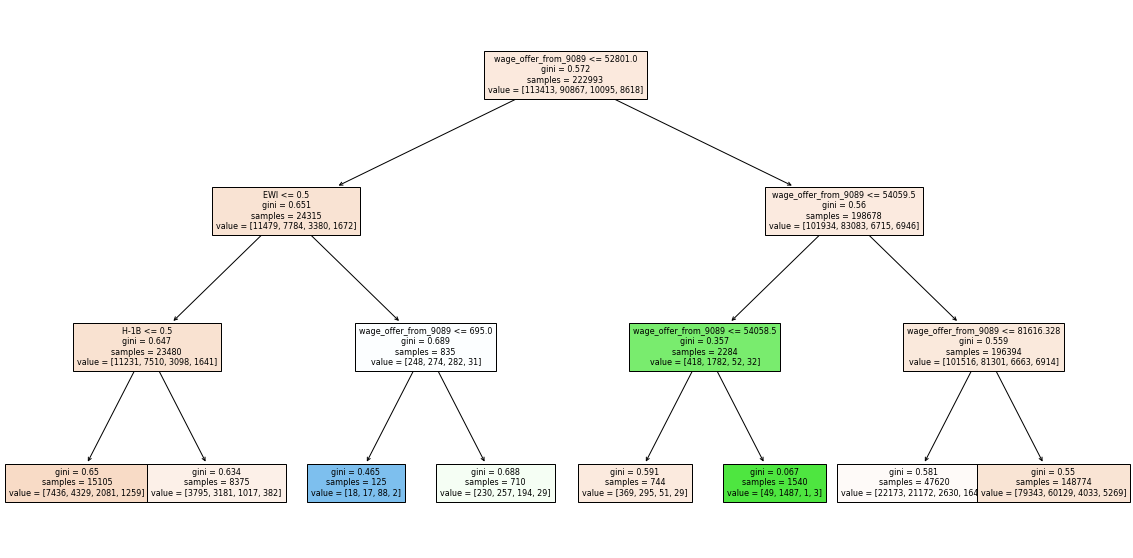

In [16]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True,fontsize=8,feature_names=X.columns)
plt.show()

# 5.) Write your interpretation of the largest (by sample size) leaf node


In a sample of 222,993 instances, a decision tree model was employed to classify the population based on the variable "wage_offer_from_9089". 

The model resulted in two leaves, each representing a distinct subgroup of the population. The left leaf represents individuals with wages less than $52,801  and a population of 24,315 individuals. 

Conversely, the right leaf represents individuals with wages higher than $52,801, comprising a population of 198,678 individuals.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a list to store the accuracy for each max_depth value
accuracies = []

# Loop over different values of max_depth
for max_depth in range(1, 20):
    # Train a decision tree classifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Predict the target values for the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score
    accuracies.append(accuracy)

# Find the max_depth value with the highest accuracy
best_max_depth = np.argmax(accuracies) + 1

print("Best max_depth:", best_max_depth)
print("Best accuracy:", np.max(accuracies))


Best max_depth: 19
Best accuracy: 0.5718065427475952
